In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from fetch_citations import *


# Play around with the data

In [4]:
pubs = json.load(open("./citations.json","r"))

In [5]:
pubs = pubs_clean(pubs, 1998)

In [6]:
citesy = cites_per_year(pubs)

In [7]:
papersy = papers_per_year(pubs)

Text(0, 0.5, 'n. of citations')

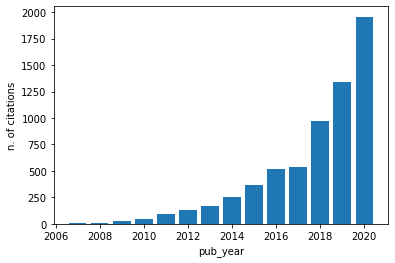

In [8]:
plt.bar(x=list(citesy.keys()), height=list(citesy.values()))
plt.xlabel("pub_year")
plt.ylabel("n. of citations")

Text(0, 0.5, 'n. of papers')

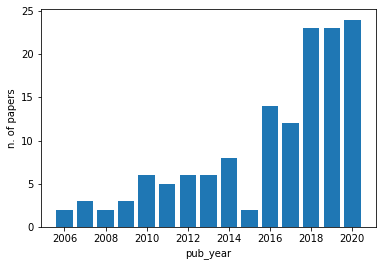

In [9]:
plt.bar(x=list(papersy.keys()), height=list(papersy.values()))
plt.xlabel("pub_year")
plt.ylabel("n. of papers")

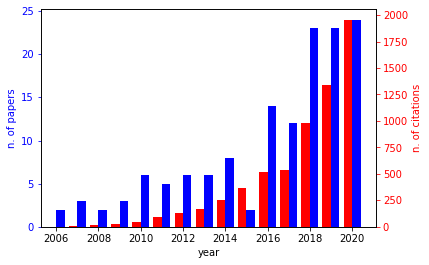

In [10]:
fig, ax1 = plt.subplots()
ax1.bar(x=list(papersy.keys()), height=list(papersy.values()),align="edge",width=0.4,color='b')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('n. of papers', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.bar(x=list(citesy.keys()), height=list(citesy.values()),align="edge",width=-0.4,color='r')
ax2.set_ylabel('n. of citations', color='r')
ax2.tick_params('y', colors='r')

fig1=fig
fig.savefig("papercites.png",dpi=300)

In [11]:
papercites = papers_cites(pubs)

In [12]:
years, ypcites, psorted = papers_cites_years_table(pubs)
ypcum = ypcites.cumsum(axis=1)
ysorted = np.asarray([p["bib"]["pub_year"] for p in psorted])
ypubs = list(set(ysorted)); ypubs.sort()

<ipython-input-13-48003bbaa9d2>:3: RuntimeWarning: divide by zero encountered in log10
  ax1.bar(range(len(pubs)),np.log10(ypcum[:,b]),width=1,label=str(years[b]), color=(b/len(years),0,1-b/len(years)))


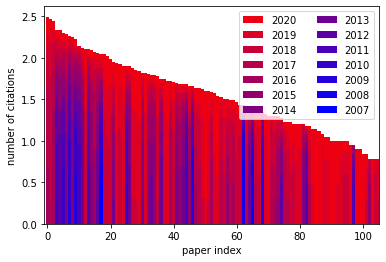

In [13]:
fig, ax1 = plt.subplots()
for b in range(len(years)-1,-1,-1):
    ax1.bar(range(len(pubs)),np.log10(ypcum[:,b]),width=1,label=str(years[b]), color=(b/len(years),0,1-b/len(years)))
ax1.legend(ncol=2)
ax1.set_xlabel("paper index")
ax1.set_ylabel("number of citations")
ax1.set_xlim(-1,105)
fig2 = fig
fig.savefig("paperhistory.png",dpi=300)

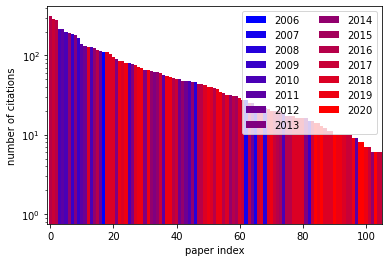

In [14]:
fig, ax1 = plt.subplots()
for y in ypubs:
    totb = ypcum[:,-1].copy()
    totb[np.where(ysorted!=y)[0]] = 0
    yf = (y-ypubs[0])/len(years)
    ax1.bar(range(len(pubs)),totb,width=1,label=str(y), color=(yf,0,1-yf))
ax1.legend(ncol=2)
ax1.set_xlabel("paper index")
ax1.set_ylabel("number of citations")
ax1.set_xlim(-1,105)
ax1.set_yscale('log')
fig2 = fig
fig.savefig("paperhistory.png",dpi=300)

(-1.0, 105.0)

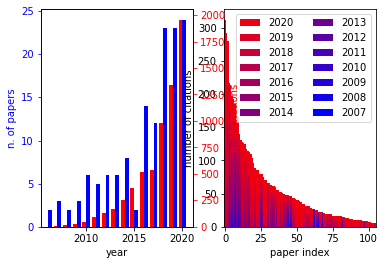

In [15]:
combo, axs= plt.subplots(ncols=2, nrows=1)
ax1 = axs[0]
ax1.bar(x=list(papersy.keys()), height=list(papersy.values()),align="edge",width=0.4,color='b')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('n. of papers', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.bar(x=list(citesy.keys()), height=list(citesy.values()),align="edge",width=-0.4,color='r')
ax2.set_ylabel('n. of citations', color='r')
ax2.tick_params('y', colors='r')

ax1 = axs[1]
for b in range(len(years)-1,-1,-1):
    ax1.bar(range(len(pubs)),ypcum[:,b],width=1,label=str(years[b]), color=(b/len(years),0,1-b/len(years)))
ax1.legend(ncol=2)
ax1.set_xlabel("paper index")
ax1.set_ylabel("number of citations")
ax1.set_xlim(-1,105)

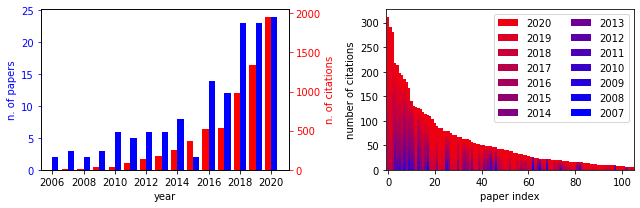

In [16]:
combo.set_size_inches(9,3)
combo.tight_layout()
combo.savefig("citationdata.png",dpi=300)
combo

# Automatic generation of standard citation analysis plot

In [17]:
rc = np.asarray([1.0,0.5,0])
bc = np.asarray((0.0,0.5,1.0))

In [18]:
def mk_citation_plot(pubs, lrange=(), rrange=()):    
    citesy = cites_per_year(pubs)
    papersy = papers_per_year(pubs)
    papercites = papers_cites(pubs)
    years, ypcites, psorted = papers_cites_years_table(pubs)
    ypcum = ypcites.cumsum(axis=1)
    ysorted = np.asarray([p["bib"]["pub_year"] for p in psorted])
    ypubs = list(set(ysorted)); ypubs.sort()

    combo, axs= plt.subplots(ncols=2, nrows=1)
    ax1 = axs[0]
    ax1.bar(x=list(papersy.keys()), height=list(papersy.values()),align="edge",width=-0.4,color=bc)
    ax1.set_xlabel('year')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('n. of papers', color=bc)
    ax1.tick_params('y', colors=bc)
    if len(lrange)>0:
        ax1.set_xlim(*lrange)

    ax2 = ax1.twinx()
    ax2.bar(x=list(citesy.keys()), height=list(citesy.values()),align="edge",width=0.4,color=rc)
    ax2.set_ylabel('n. of citations', color=rc)
    ax2.tick_params('y', colors=rc)

    ax1 = axs[1]
    for y in ypubs:
        totb = ypcum[:,-1].copy()
        totb[np.where(ysorted!=y)[0]] = 0
        yf = (y-ypubs[0])/len(years)
        ax1.bar(range(len(pubs)),totb,width=1,label=str(y), color=yf*rc+(1-yf)*bc)    
    ax1.legend(ncol=2)
    ax1.set_xlabel("paper index")
    ax1.set_ylabel("number of citations")
    if len(rrange)>0:
        ax1.set_xlim(*rrange)
    ax1.axvline(h_index(pubs),ls='--',c='k')
    ax1.set_yscale('log')
    (y0,y1) = ax1.get_ylim()
    ax1.text(h_index(pubs)*0.95, y1-(y1-y0)*0.05, "h", horizontalalignment='right', verticalalignment='top')
    
    combo.set_size_inches(9,3)
    combo.tight_layout()
    
    return combo

/home/michele/local/lib/python3.8/site-packages/matplotlib/lines.py:1184: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):
/home/michele/local/lib/python3.8/site-packages/matplotlib/axis.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


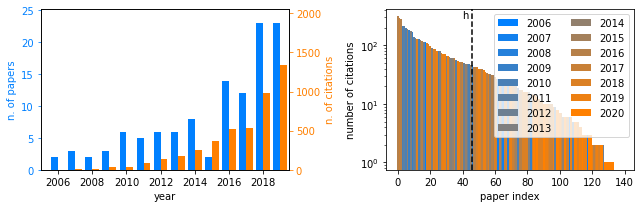

In [19]:
pubs = pubs_clean(json.load(open("citations.json","r")))
plots = mk_citation_plot(pubs, lrange=(2005,2019.5))

In [20]:
def mk_comparison_plot(pubs1, pubs2, ygrad=(0,0), names=("",""), lrange=(), rrange=()):    
    citesy1 = cites_per_year(pubs1)
    papersy1 = papers_per_year(pubs1)
    papercites1 = papers_cites(pubs1)
    years1, ypcites1, psorted1 = papers_cites_years_table(pubs1)
    ypcum1 = ypcites1.cumsum(axis=1)
    ysorted1 = np.asarray([p["bib"]["pub_year"] for p in psorted1])
    ypubs1 = list(set(ysorted1)); ypubs1.sort()
    
    citesy2 = cites_per_year(pubs2)
    papersy2 = papers_per_year(pubs2)
    papercites2 = papers_cites(pubs2)
    years2, ypcites2, psorted2 = papers_cites_years_table(pubs2)
    ypcum2 = ypcites2.cumsum(axis=1)
    ysorted2 = np.asarray([p["bib"]["pub_year"] for p in psorted2])
    ypubs2 = list(set(ysorted2)); ypubs2.sort()
    

    combo, axs= plt.subplots(ncols=2, nrows=1)
    ax1 = axs[0]
    ax1.bar(x=(np.asarray(list(papersy1.keys()))-ygrad[0]), 
            height=list(papersy1.values()),align="edge",width=-0.4,
            color=bc, label=names[0])
    if ygrad[0]==0 and ygrad[1]==0:
        ax1.set_xlabel('year')
    else:
        ax1.set_xlabel('years since graduation')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('n. of papers', color=bc)
    ax1.tick_params('y', colors=bc)
    if len(lrange)>0:
        ax1.set_xlim(*lrange)

    ax2 = ax1.twinx()
    ax2.bar(x=(np.asarray(list(citesy1.keys()))-ygrad[0]), height=list(citesy1.values()),align="edge",width=0.4,color=rc)
    ax2.set_ylabel('n. of citations', color=rc)
    ax2.tick_params('y', colors=rc)
    
    dy = max(max(papersy1.values()),max(papersy2.values()))*0.02
    ax1.bar(x=(np.asarray(list(papersy2.keys()))-ygrad[1]), 
            height=dy,align="edge",width=-0.4,
            bottom=np.asarray(list(papersy2.values()))-dy/2,
            color=(0.0,0,0.5), label=names[1])
    
    dy = max(max(citesy1.values()),max(citesy2.values()))*0.02
    ax2.bar(x=(np.asarray(list(citesy2.keys()))-ygrad[1]), 
            height=dy,align="edge",width=0.4,
            bottom=np.asarray(list(citesy2.values()))-dy/2,
            color=(0.5,0,0.0))
    
    ax1.set_ylim(0); ax2.set_ylim(0)
    ax1.legend(loc='upper left')
    
    ax1 = axs[1]
    ax1.plot(range(len(pubs1)), ypcum1[:,-1], 'r-', label=names[0])
    ax1.plot(range(len(pubs2)), ypcum2[:,-1], 'k-', label=names[1])
    ax1.legend(ncol=2)
    ax1.set_xlabel("paper index")
    ax1.set_ylabel("cit./paper")
    if len(rrange)>0:
        ax1.set_xlim(*rrange)
        
    ax1.axvline(h_index(pubs1)+0.25,ls='--',c='r')
    ax1.axvline(h_index(pubs2)-0.25,ls='--',c='k')
    ax1.set_yscale('log')
    
    combo.set_size_inches(9,3)
    combo.tight_layout()
    
    return combo

/home/michele/local/lib/python3.8/site-packages/matplotlib/axis.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


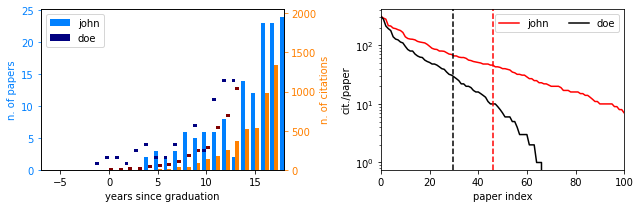

In [21]:
pubs = pubs_clean(json.load(open("citations.json","r")))
plots = mk_comparison_plot(pubs, pubs[::2], ygrad=(2002,2007), lrange=(-7,18), rrange=(0,100), names=("john", "doe"))
plots.savefig("citations_comparison.png",dpi=300)

In [22]:
print("h-index: ",h_index(pubs))
print("<cites>: ",np.mean(papers_cites(pubs)))
print("median:  ",np.median(papers_cites(pubs)))

h-index:  46
<cites>:  46.68345323741007
median:   21.0
